In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.iloc[:,2:]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
193,15662901,Male,19,70000,0
232,15813113,Male,40,107000,1
399,15594041,Female,49,36000,1
283,15663249,Female,52,21000,1
317,15684861,Male,35,55000,0


**1)Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                               test_size=0.3,
                                               random_state=0)
X_train.shape,X_test.shape


((280, 4), (120, 4))

**2)Standard Scaler**

In [ ]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#creating a label encoder object and scaler object
label=LabelEncoder()
#scaler=StandardScaler()
#fit the scaler to train the test it will learn the parameters
#scaler.fit(X_train)
label.fit(X_train['Gender'])
#transform the train sets and test sets
X_train['Gender']=label.transform(X_train['Gender'])
X_test['Gender']=label.transform(X_test['Gender'])
#X_train_scaled=scaler.transform(X_train)
#X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
#creating  a scaler object
scaler=StandardScaler()
#Now fitting the train test will learn parameters
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train

,User ID,Gender,Age,EstimatedSalary
92,15809823,1,26,15000
223,15593715,1,60,102000
234,15619407,0,38,112000
232,15813113,1,40,107000
377,15800215,0,42,53000
...,...,...,...,...
323,15619465,0,48,30000
192,15779581,1,29,43000
117,15591433,1,36,52000
47,15776348,0,27,54000


In [ ]:
X_train_scaled

array([[ 1.67118864,  0.99288247, -1.1631724 , -1.5849703 ],
       [-1.38839503,  0.99288247,  2.17018137,  0.93098672],
       [-1.02465642, -1.00716855,  0.0133054 ,  1.22017719],
       ...,
       [-1.42070282,  0.99288247, -0.18277423, -0.51496559],
       [ 1.19726096, -1.00716855, -1.06513258, -0.45712749],
       [ 1.45653019, -1.00716855, -1.1631724 ,  1.39369146]])

In [113]:
#so whenever we are going to transform the data by scaling we will get the data in the form of an array and it is difficult to read
df1=pd.DataFrame(X_train_scaled,columns=X_train.columns)
df2=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train.describe())

,User ID,Gender,Age,EstimatedSalary
count,280.0,280.0,280.0,280.0
mean,15691782.0,1.0,38.0,69807.0
std,70760.0,1.0,10.0,34641.0
min,15569641.0,0.0,18.0,15000.0
25%,15628197.0,0.0,30.0,43000.0
50%,15694424.0,1.0,37.0,70500.0
75%,15751111.0,1.0,46.0,88000.0
max,15814816.0,1.0,60.0,150000.0


In [ ]:
np.round(X_train.describe(), 1)

,User ID,Gender,Age,EstimatedSalary
count,280.0,280.0,280.0,280.0
mean,15691781.7,0.5,37.9,69807.1
std,70759.6,0.5,10.2,34641.2
min,15569641.0,0.0,18.0,15000.0
25%,15628197.2,0.0,30.0,43000.0
50%,15694424.0,1.0,37.0,70500.0
75%,15751110.8,1.0,46.0,88000.0
max,15814816.0,1.0,60.0,150000.0


**Effect of Scaling**


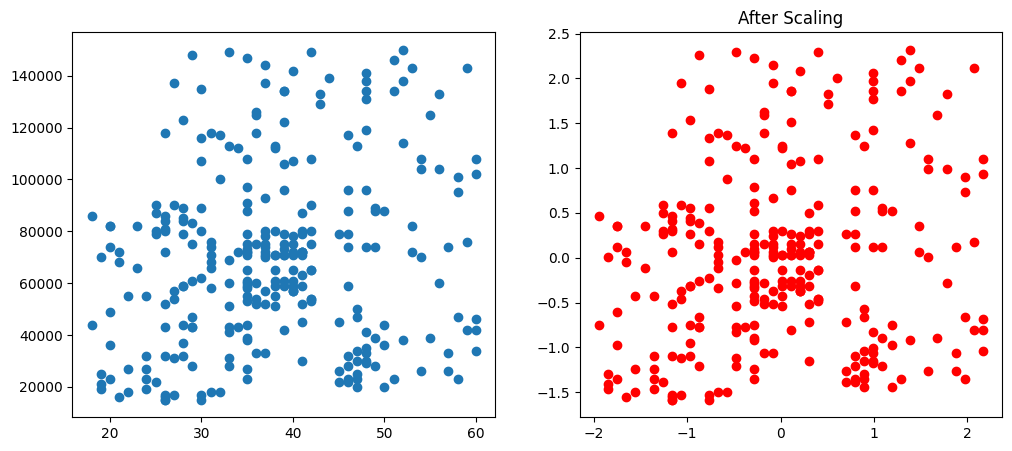

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title=("Before Scaling")
ax2.scatter(df1['Age'],df1['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

Text(0.5, 1.0, 'After Scaling')

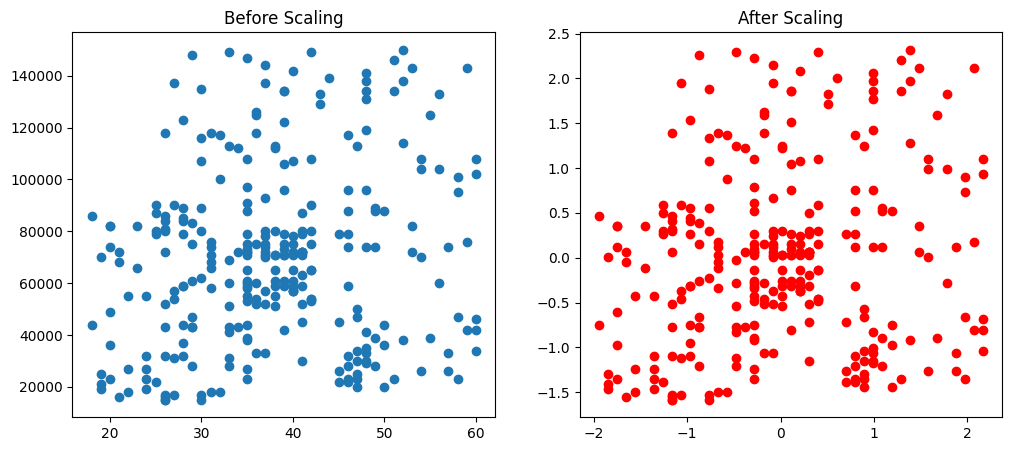

In [ ]:
#alternate method if the data is in the form of numpy array
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled[:, 2], X_train_scaled[:, 3], color='red')
ax2.set_title("After Scaling")

**Benfits of Scaling**

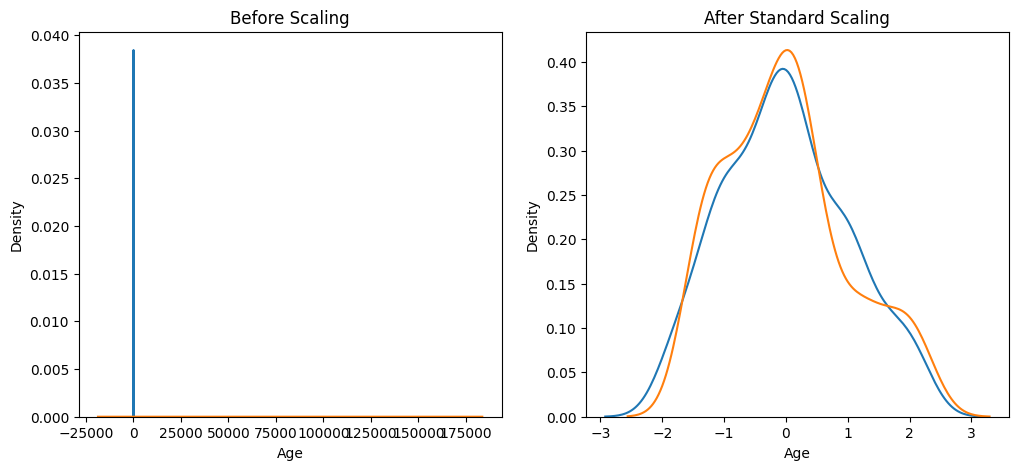

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(df1['Age'],ax=ax2)
sns.kdeplot(df1['EstimatedSalary'],ax=ax2)
plt.show()


**Comparision of Distributions**

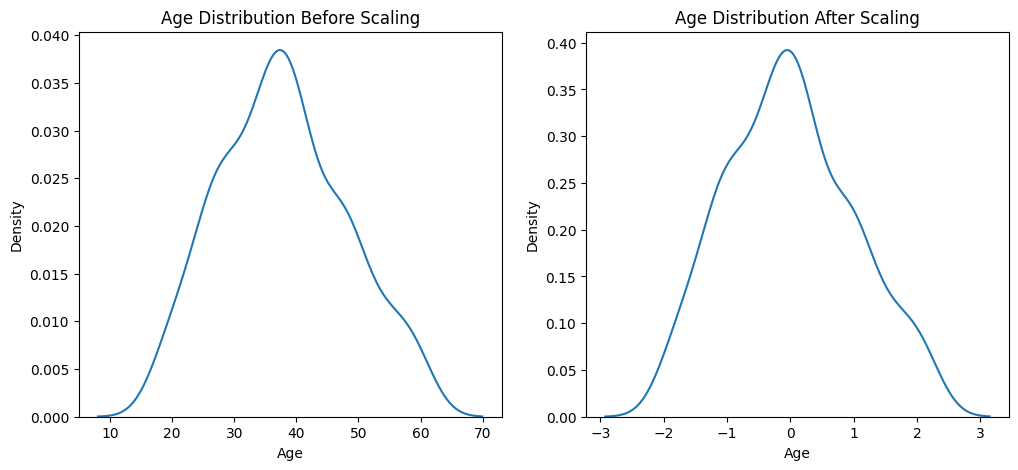

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(df1['Age'],ax=ax2)
plt.show()

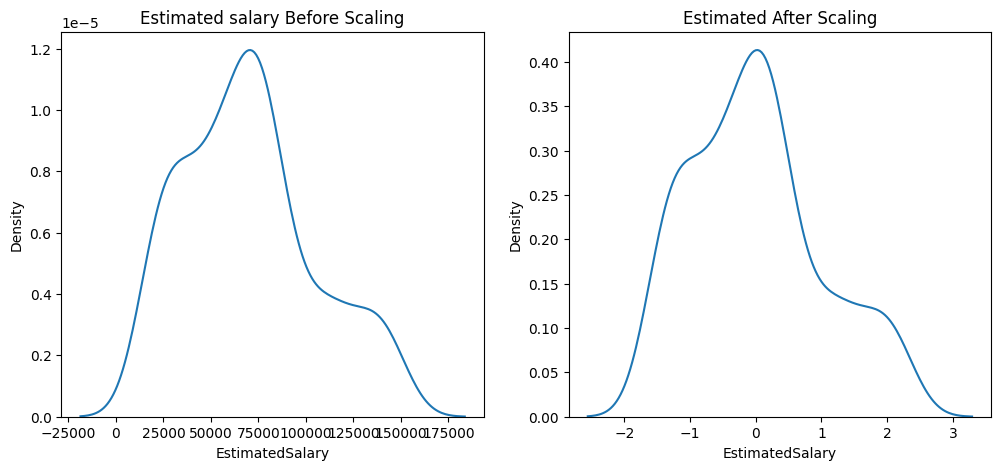

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before scaling
ax1.set_title("Estimated salary Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#After Scalig
ax2.set_title("Estimated After Scaling")
sns.kdeplot(df1['EstimatedSalary'],ax=ax2)
plt.show()

**Why Scaling is Important?**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [ ]:
#Before Scaling
lr.fit(X_train,y_train)
#After scaling
lr_scaled.fit(df1,y_train)

LogisticRegression()

In [ ]:
pre1=lr.predict(X_test)
pre1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
pre2=lr_scaled.predict(df1)

**Trained the data to check the accuracy using Logistic Regression Algorithm**

In [107]:
from sklearn.metrics import accuracy_score
print("Accuracy of the data before scaling={}".format(accuracy_score(y_test,pre1)*100))
pre2 = pre2[:len(y_test)] #nu
y_test = y_test.append(pd.Series([0] * (len(pre2) - len(y_test))))#nu
print("Actual data after scaling",accuracy_score(y_test[:len(pre2)],pre2)*100)

Accuracy of the data before scaling=79.16666666666666
Actual data after scaling 56.666666666666664


<ipython-input-107-0f903f88797f>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = y_test.append(pd.Series([0] * (len(pre2) - len(y_test))))#nu
<ipython-input-107-0f903f88797f>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test = y_test.append(pd.Series([0] * (len(pre2) - len(y_test))))#nu


In [116]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()


In [117]:
dt.fit(X_train,y_train)
dt_scaled.fit(df1,y_train)

DecisionTreeClassifier()

In [118]:
y_pred=dt.predict(X_test)

In [119]:
y_pred_scaled=dt_scaled.predict(df2)

In [123]:
from sklearn.metrics import accuracy_score
print("Actual accuracy score={}".format(accuracy_score(y_test,y_pred)*100))

Actual accuracy score=88.33333333333333


In [124]:
from sklearn.metrics import accuracy_score
print("Actual accuracy score={}".format(accuracy_score(y_test,y_pred_scaled)*100))

Actual accuracy score=86.66666666666667


In [125]:
df.describe()

,User ID,Gender,Age,EstimatedSalary
count,120.000000,120.000000,120.000000,120.000000
mean,-0.011418,-0.090478,-0.068394,-0.006231
std,1.047829,1.000726,1.088712,0.952412
min,-1.771020,-1.007169,-1.947491,-1.584970
25%,-0.977409,-1.007169,-0.967093,-0.659561
50%,-0.016107,-1.007169,-0.182774,-0.153478
75%,0.789786,0.992882,0.724094,0.497201
max,1.747824,0.992882,2.170181,2.319101


**Effect of Outlier**

In [127]:
df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))

<ipython-input-127-1dd81d25d6fe>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))


In [128]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,0.479637,0.992882,-0.771013,0.497201,NaN
1,-0.557553,-1.007169,0.013305,-0.572804,NaN
2,1.204283,0.992882,-0.280814,0.150172,NaN
3,0.660686,-1.007169,-0.771013,0.265849,NaN
4,-0.761381,-1.007169,-0.280814,-0.572804,NaN
...,...,...,...,...,...
118,-1.046318,-1.007169,0.797624,0.352606,NaN
119,-0.878379,-1.007169,0.895664,-0.543885,NaN
0,NaN,NaN,5.000000,1000.000000,0.0
1,NaN,NaN,90.000000,250000.000000,1.0


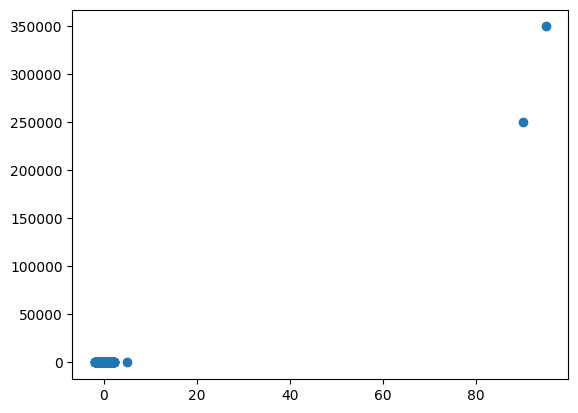

In [129]:
plt.scatter(df['Age'],df['EstimatedSalary'])